# Generación de números aleatorios
## TC3002
### Armando Arredondo Valle

### Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Funcionalidades

####  Estilos

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

####  Generación de 10,000 números con distribución uniforme

In [4]:
np.random.seed(42)  # Para reproducibilidad
uniform_numbers = np.random.uniform(0, 1, 10000)

#### Visualización en Histograma

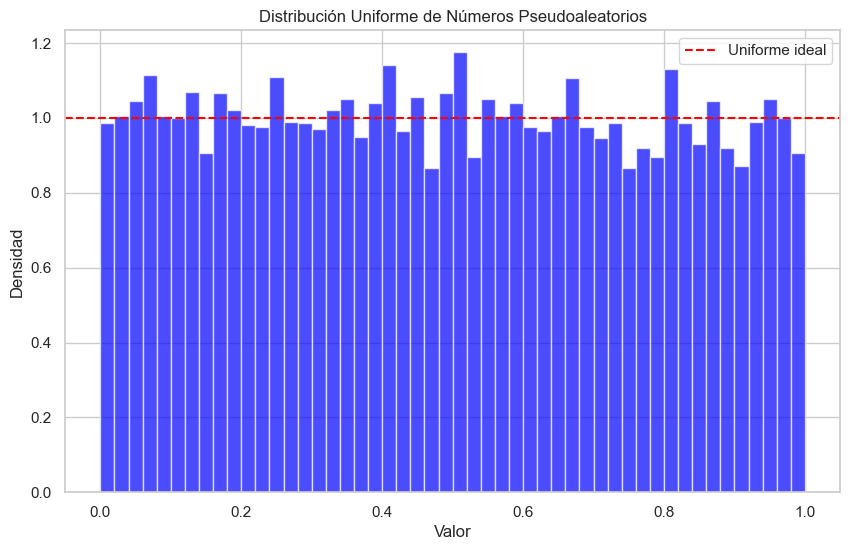

In [5]:
plt.figure()
plt.hist(uniform_numbers, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Distribución Uniforme de Números Pseudoaleatorios')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.axhline(y=1, color='red', linestyle='--', label='Uniforme ideal')
plt.legend()
plt.show()


#### Pruebas de uniformidad

Chi cuadrado

In [6]:
observed_freq, _ = np.histogram(uniform_numbers, bins=10)
expected_freq = np.full(10, 10000/10)
chi2_stat, chi2_p = stats.chisquare(observed_freq, expected_freq)

In [7]:
print("\nPrueba Chi-cuadrado:")
print(f"Estadístico Chi2: {chi2_stat:.4f}")
print(f"Valor p: {chi2_p:.4f}")
if chi2_p > 0.05:
    print("No se rechaza la hipótesis de uniformidad (p > 0.05)")
else:
    print("Se rechaza la hipótesis de uniformidad (p ≤ 0.05)")


Prueba Chi-cuadrado:
Estadístico Chi2: 10.1000
Valor p: 0.3425
No se rechaza la hipótesis de uniformidad (p > 0.05)


 Kolmogorov-Smirnov

In [8]:
ks_stat, ks_p = stats.kstest(uniform_numbers, 'uniform')
print("\nPrueba Kolmogorov-Smirnov:")
print(f"Estadístico KS: {ks_stat:.4f}")
print(f"Valor p: {ks_p:.4f}")
if ks_p > 0.05:
    print("No se rechaza la hipótesis de uniformidad (p > 0.05)")
else:
    print("Se rechaza la hipótesis de uniformidad (p ≤ 0.05)")


Prueba Kolmogorov-Smirnov:
Estadístico KS: 0.0125
Valor p: 0.0859
No se rechaza la hipótesis de uniformidad (p > 0.05)


#### Pruebas

In [9]:
def runs_test(data):
    median = np.median(data)
    runs = []
    current_run = data[0] >= median
    run_length = 1
    
    for num in data[1:]:
        if (num >= median) == current_run:
            run_length += 1
        else:
            runs.append(run_length)
            current_run = not current_run
            run_length = 1
    runs.append(run_length)
    
    n = len(data)
    n1 = sum(1 for num in data if num >= median)
    n2 = n - n1
    R = len(runs)
    
    expected_R = (2 * n1 * n2) / n + 1
    std_R = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n)) / (n**2 * (n - 1)))
    
    if std_R == 0:
        z = 0
    else:
        z = (R - expected_R) / std_R
    
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    return z, p_value

In [10]:
runs_z, runs_p = runs_test(uniform_numbers)
print("\nPrueba de Corridas:")
print(f"Estadístico Z: {runs_z:.4f}")
print(f"Valor p: {runs_p:.4f}")
if runs_p > 0.05:
    print("No se rechaza la hipótesis de aleatoriedad (p > 0.05)")
else:
    print("Se rechaza la hipótesis de aleatoriedad (p ≤ 0.05)")



Prueba de Corridas:
Estadístico Z: 1.2401
Valor p: 0.2150
No se rechaza la hipótesis de aleatoriedad (p > 0.05)


Prueba de Autocorrelación (lag=1)

In [11]:
def autocorrelation_test(data, lag=1):
    n = len(data)
    mean = np.mean(data)
    var = np.var(data)
    
    if var == 0:
        return 0, 1.0
    
    autocorr = np.sum((data[:n-lag] - mean) * (data[lag:] - mean)) / (n * var)
    
    # Prueba de significancia
    se = 1 / np.sqrt(n)
    z = autocorr / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    return autocorr, p_value

In [12]:
autocorr, autocorr_p = autocorrelation_test(uniform_numbers)
print("\nPrueba de Autocorrelación (lag=1):")
print(f"Coeficiente de autocorrelación: {autocorr:.4f}")
print(f"Valor p: {autocorr_p:.4f}")
if autocorr_p > 0.05:
    print("No hay evidencia de autocorrelación significativa (p > 0.05)")
else:
    print("Hay evidencia de autocorrelación significativa (p ≤ 0.05)")

# 5. Transformada inversa a distribución Weibull
def inverse_transform_weibull(u, shape=1.5, scale=1.0):
    """Transformación inversa para distribución Weibull"""
    return scale * (-np.log(1 - u)) ** (1/shape)



Prueba de Autocorrelación (lag=1):
Coeficiente de autocorrelación: -0.0125
Valor p: 0.2118
No hay evidencia de autocorrelación significativa (p > 0.05)


Parámetros de Weibull

In [13]:
shape_param = 1.5
scale_param = 1.0

weibull_numbers = inverse_transform_weibull(uniform_numbers, shape_param, scale_param)

Distribución Transformada

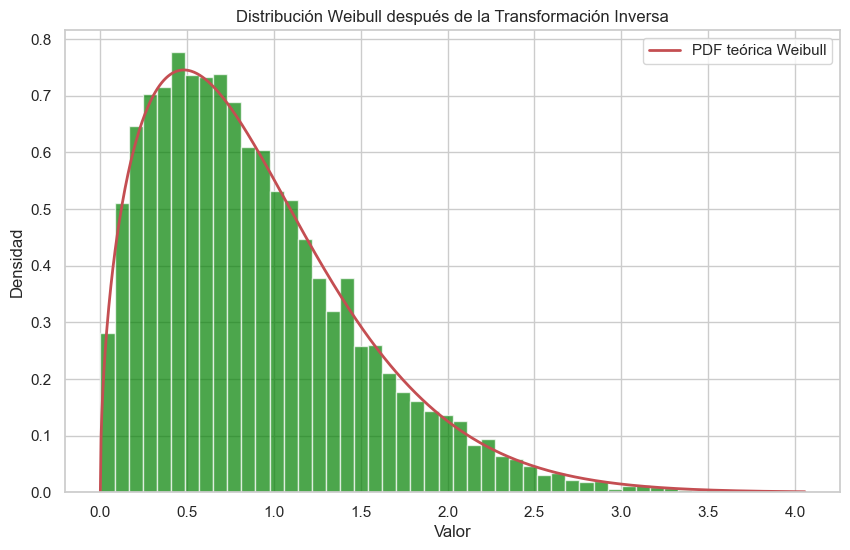

In [14]:
plt.figure()
plt.hist(weibull_numbers, bins=50, density=True, alpha=0.7, color='green')
x = np.linspace(0, np.max(weibull_numbers), 1000)
pdf = (shape_param/scale_param) * (x/scale_param)**(shape_param-1) * np.exp(-(x/scale_param)**shape_param)
plt.plot(x, pdf, 'r-', lw=2, label='PDF teórica Weibull')
plt.title('Distribución Weibull después de la Transformación Inversa')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()
